In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Task 1. Plot hists.

df contains information about the number of reads with each of the 4 nucleotides at different positions (columns A, T, G, C). Plot a histogram of the distribution of these numbers.

In [75]:
url = "https://raw.githubusercontent.com/Serfentum/bf_course/master/14.pandas/train.csv"
df = pd.read_csv(url)

In [76]:
df

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,337,8056,7542,471,58,7,NaN,63.0,47.0,367.0,NaN,0.004584,0.045444,0.007767
59,338,8061,7967,62,29,5,17.0,NaN,26.0,33.0,0.001060,0.002207,0.003992,NaN
60,339,8062,8002,48,14,3,14.0,14.0,33.0,NaN,0.001076,0.002953,NaN,0.001322
61,340,8061,7918,146,16,4,NaN,75.0,43.0,33.0,NaN,0.005307,0.002951,0.008808


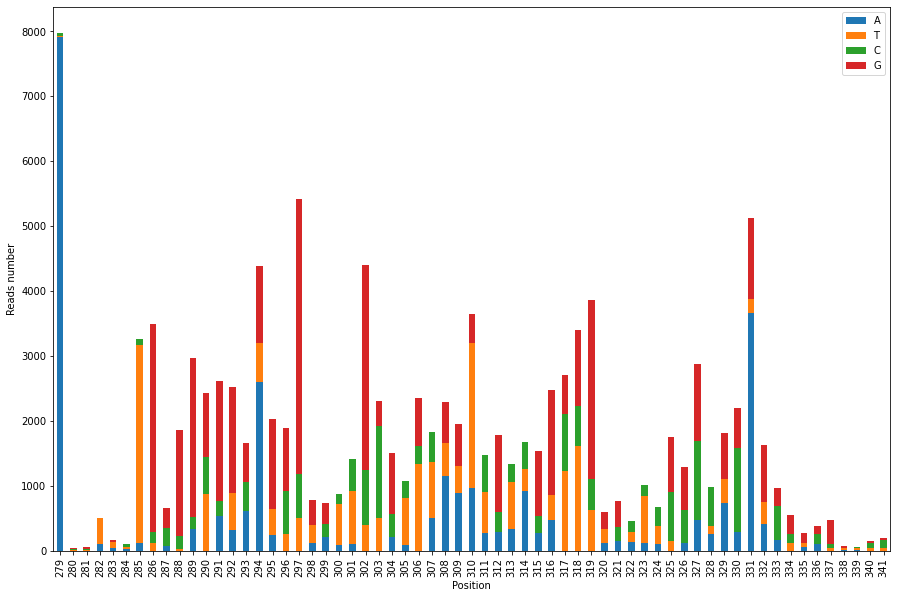

In [77]:
plt.rcParams['figure.figsize'] = 15, 10
df[['pos', 'A', 'T', 'C', 'G']].groupby('pos').sum().plot.bar(stacked=True, 
                                                              ylabel = 'Reads number', 
                                                              xlabel = 'Position')

plt.savefig('./data/task_1_hist.png')

# Task 2. Select data.


Write to the file `train_part.csv` some parts of the `train.csv` (from prev task):
1. Strings where matches bigger than mean;
2. Cols 'pos', 'reads_all', 'mismatches', 'deletions', 'insertions'

In [78]:
df_selected = df[df['matches'] > df['matches'].mean()][['pos', 'reads_all', 'mismatches', 'deletions', 'insertions']]

df_selected.to_csv("./data/train_part.csv")

# Task 3. Small EDA 


Data - https://www.kaggle.com/yasserh/wine-quality-dataset.

Проведите Explorative Data Analysis какого-нибудь датасета (прошу, только не Титаник). Нужны корреляции, графики распределений

In [65]:
vine = pd.read_csv('./data/WineQT.csv')
vine = vine.drop('Id', axis=1)

In [66]:
vine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [67]:
vine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [68]:
vine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [69]:
vine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


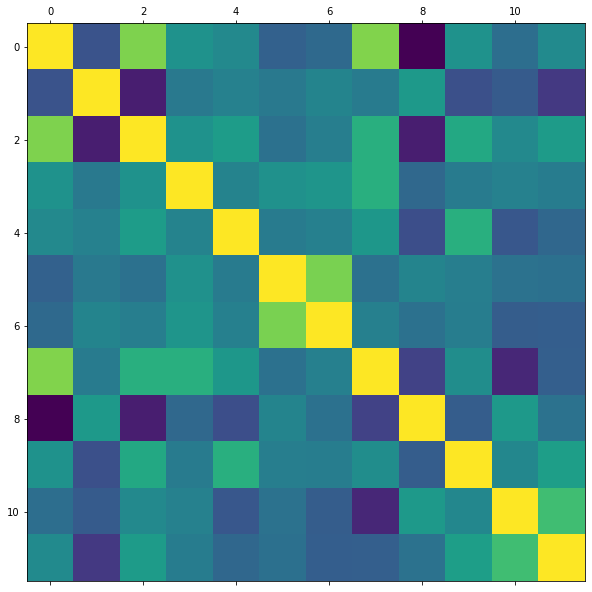

In [70]:
plt.matshow(vine.corr())
plt.show()

In [71]:
vine.corr().style.background_gradient(cmap = 'PRGn')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


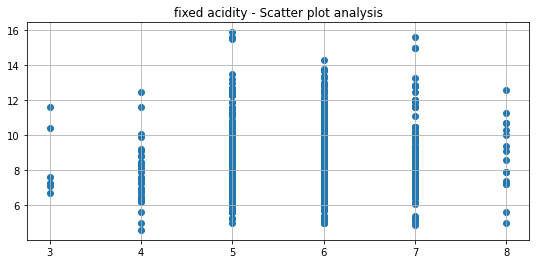

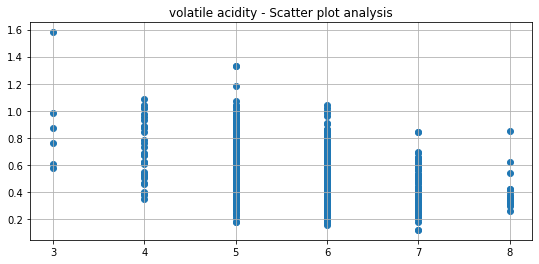

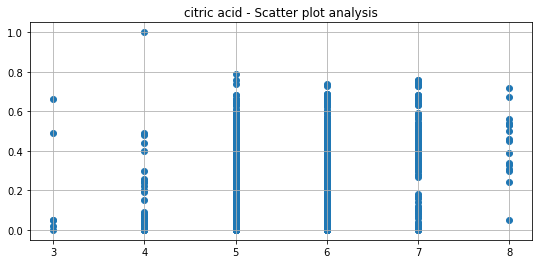

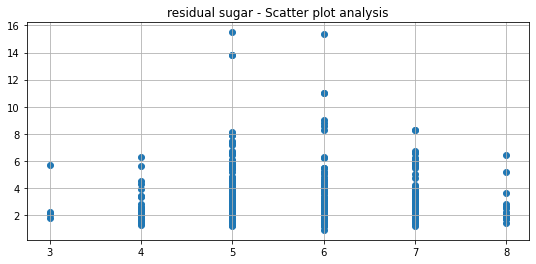

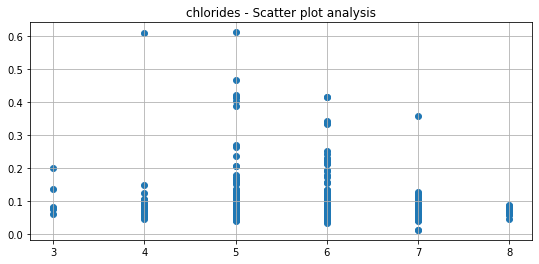

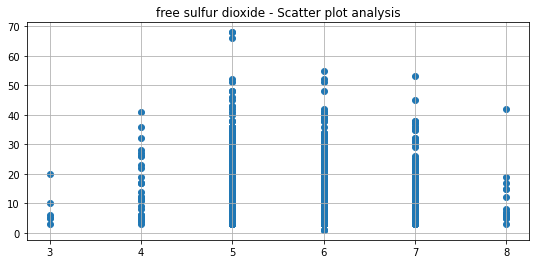

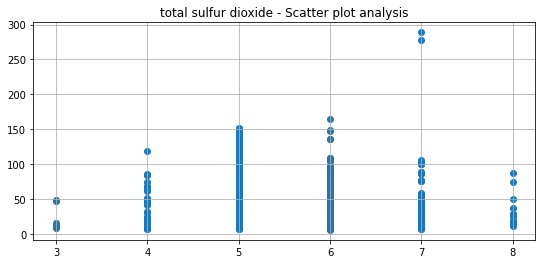

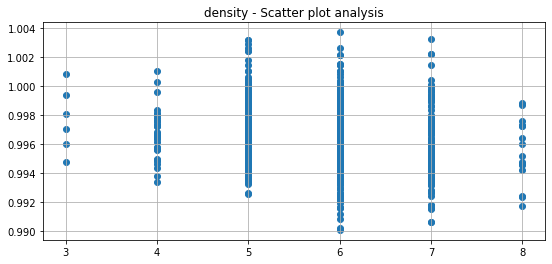

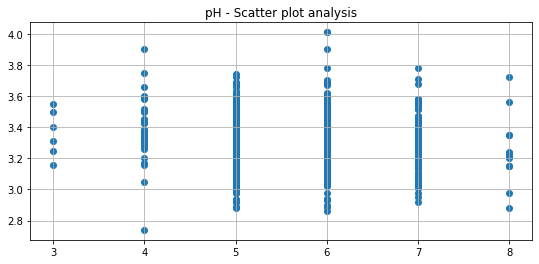

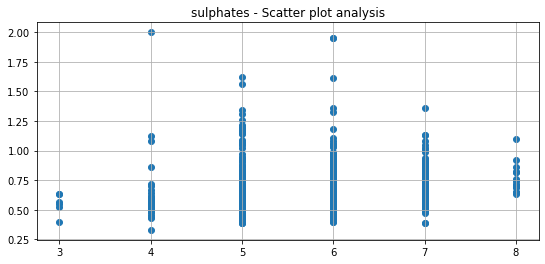

In [72]:
for data in vine.columns[:-2]:
       
    f, ax = plt.subplots(1, 1, figsize=(9, 4))    
    ax = plt.scatter(y=vine[data],
                    x=vine['quality'])
    plt.grid()
    plt.title(f"{data} - Scatter plot analysis")

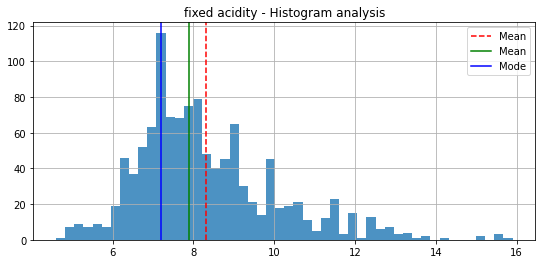

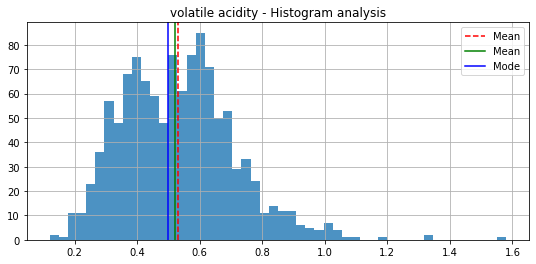

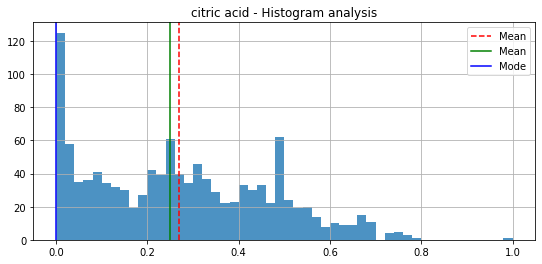

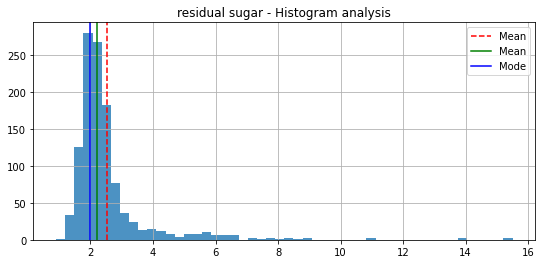

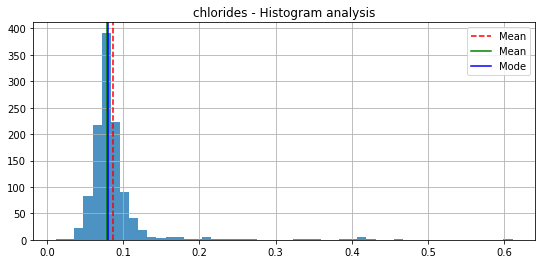

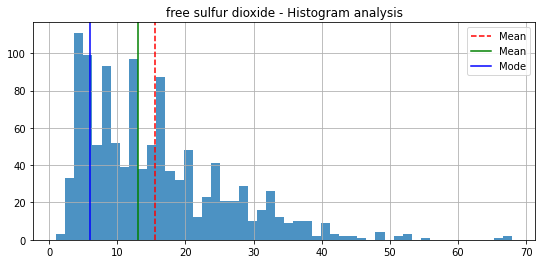

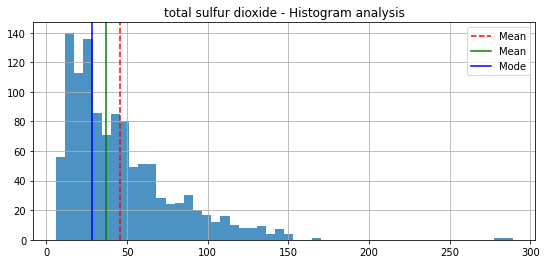

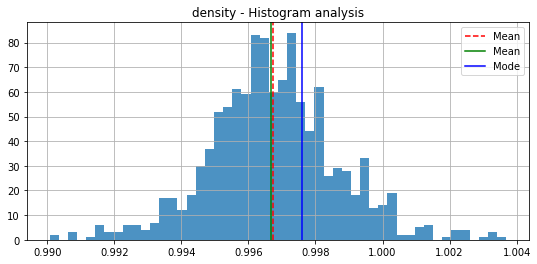

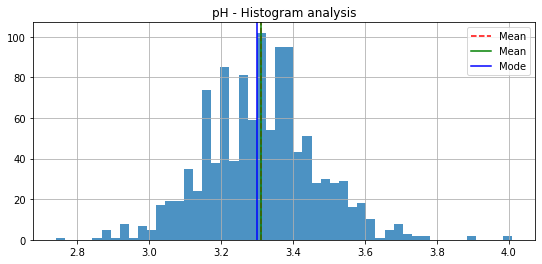

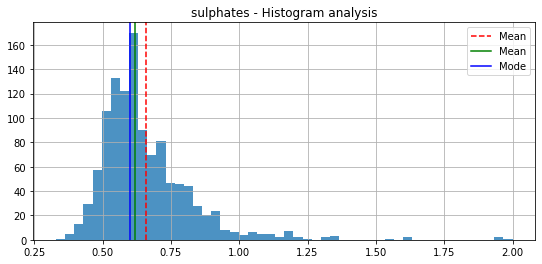

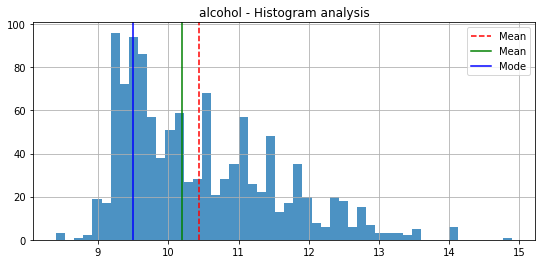

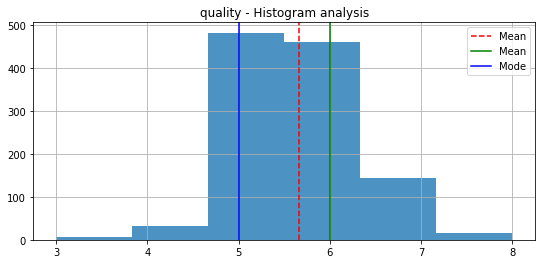

In [73]:
for data in vine.columns:
    
    bins = [len(set(vine[data].values)) if len(set(vine[data].values)) < 50 else 50]
    
    f, ax = plt.subplots(1, 1, figsize=(9, 4))    
    plt.hist(vine[data], bins=bins[0], alpha=0.8)
    
    mean = vine[data].mean()
    median = vine[data].median()
    mode = vine[data].mode().values[0]
    
    ax.axvline(mean, color='r', linestyle='--', label="Mean")
    ax.axvline(median, color='g', linestyle='-', label="Mean")
    ax.axvline(mode, color='b', linestyle='-', label="Mode")
    
    ax.legend()
    plt.grid()
    plt.title(f"{data} - Histogram analysis")

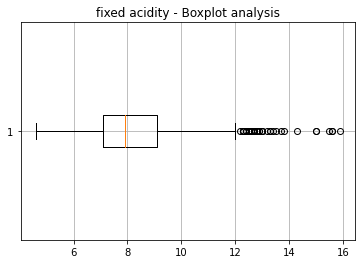

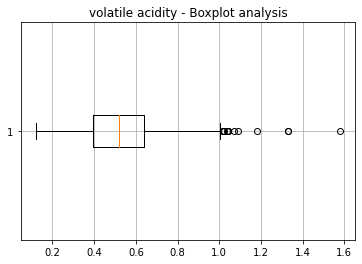

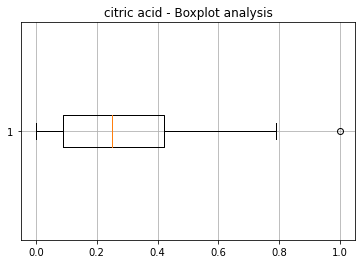

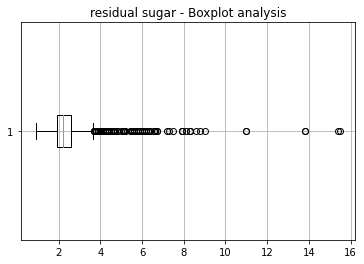

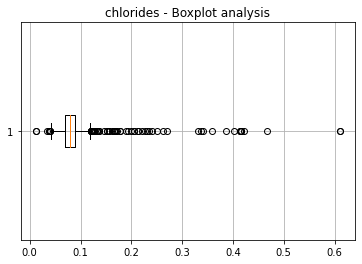

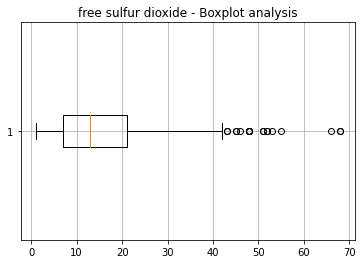

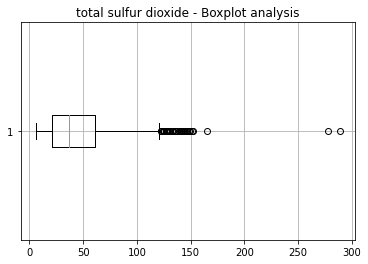

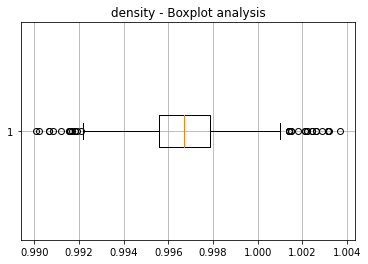

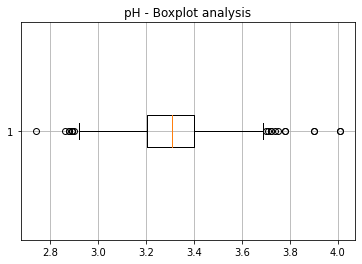

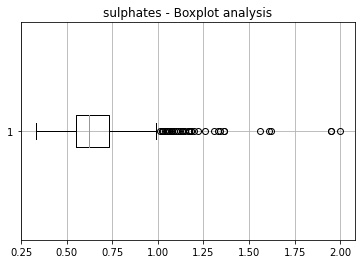

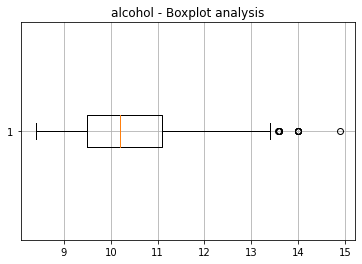

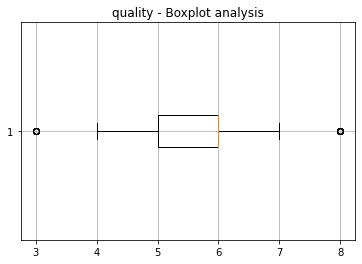

In [84]:
for data in vine.columns:
    
    bins = [len(set(vine[data].values)) if len(set(vine[data].values)) < 50 else 50]
    
    f, ax = plt.subplots(1, 1, figsize=(6, 4))    
    plt.boxplot(vine[data], vert=False)
    
    plt.grid()
    plt.title(f"{data} - Boxplot analysis")

# Task 4. Work with bioinf data

- `rrna_annotation.gff` - annotation of ribosomal RNA.
- `alignment.bed` - file with metagenomic assembly alignment to the same dataset. 


## 4.1. read_gff and read_bed6

Напишите функции read_gff и read_bed6 для чтения соответствующих форматов. Они должны возвращать датафреймы как в примере (картинка Example1), но имена колонок можно сделать любыми.

In [139]:
def read_gff(file):
    '''
    Read gff file and return Pandas DataFrame.
    '''    
    colnames = ['chromosome', 'source', 'type',
                'start', 'end', 'score',
                'strand', 'phase', 'attributes']
    lines = []
    
    with open(file) as f:
        for line in f:
            line = f.readline().strip('\n^').split('\t')
            if line != ['']:
                lines.append(line)

    df_gff = pd.DataFrame(lines, columns=colnames)
        
    return df_gff

In [140]:
gff_df = read_gff('./data/rrna_annotation.gff')

In [141]:
gff_df

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,469298,470826,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.0,-,.,Name=23S_rRNA;product=23S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,6168837,6170367,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA
4,Reference_10,barrnap:0.9,rRNA,6283193,6284716,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA
...,...,...,...,...,...,...,...,...,...
169,Reference_14,barrnap:0.9,rRNA,3770571,3772040,0.0,-,.,Name=16S_rRNA;product=16S ribosomal RNA
170,Reference_25,barrnap:0.9,rRNA,1329601,1332508,0.0,-,.,Name=23S_rRNA;product=23S ribosomal RNA
171,Reference_25,barrnap:0.9,rRNA,1817946,1819416,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA
172,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.9e-10,+,.,Name=5S_rRNA;product=5S ribosomal RNA


In [121]:
def read_bed6(file):
    '''
    Read bed6 file and return Pandas DataFrame.
    '''    
    colnames = ['chromosome', 'start', 'end', 'name', 'score', 'strand']
    lines = []
    
    with open(file) as f:
        for line in f:
            line = f.readline().strip('\n^').split('\t')
            if line != ['']:
                lines.append(line)

    df_bed6 = pd.DataFrame(lines, columns=colnames)
        
    return df_bed6

In [123]:
df_bed6 = read_bed6('./data/alignment.bed')

In [124]:
df_bed6

,chromosome,start,end,name,score,strand
0,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
1,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
2,Reference_1,1763926,1764363,NODE_5666_length_436_cov_418.653543,0,-
3,Reference_1,1767018,1769623,NODE_1445_length_2603_cov_1135.593799,0,+
4,Reference_1,2018035,2034640,NODE_778_length_16705_cov_121.032613,60,-
...,...,...,...,...,...,...
3850,Reference_26,5314384,5314439,NODE_19738_length_90_cov_11.600000,0,+
3851,Reference_26,5532081,5532487,NODE_6123_length_406_cov_55.763533,0,-
3852,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
3853,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+


## 4.2 Truncate attributes column

Колонка с атрибутами несёт слишком много избыточной информации и ей не удобно пользоваться, оставьте в ней только данные о типе рРНК одной короткой строкой (16S, 23S, 5S).


In [142]:
gff_df['attributes'] = gff_df['attributes'].str.replace(r'(?<=[0-9]S).*', '', regex=True)
gff_df['attributes'] = gff_df['attributes'].str.replace(r'.*=(?=[0-9]{1,2}S)', '', regex=True)

In [152]:
gff_df.head()

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,469298,470826,0.0,+,.,16S
2,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.0,-,.,23S
3,Reference_10,barrnap:0.9,rRNA,6168837,6170367,0.0,+,.,16S
4,Reference_10,barrnap:0.9,rRNA,6283193,6284716,0.0,+,.,16S


## 4.3 Count RNA types for each chr

Сделайте таблицу, где для каждой хромосомы (на самом деле это не хромосомы, а референсные геномы) показано количество рРНК каждого типа. Можно построить barplot, отображающий эти данные

In [186]:
gff_df.groupby('chromosome').attributes.value_counts()

chromosome    attributes
Reference_1   16S           1
              23S           1
              5S            1
Reference_10  16S           4
              23S           1
                           ..
Reference_7   5S            3
Reference_8   23S           2
Reference_9   16S           3
              23S           3
              5S            3
Name: attributes, Length: 71, dtype: int64

<AxesSubplot:ylabel='chromosome'>

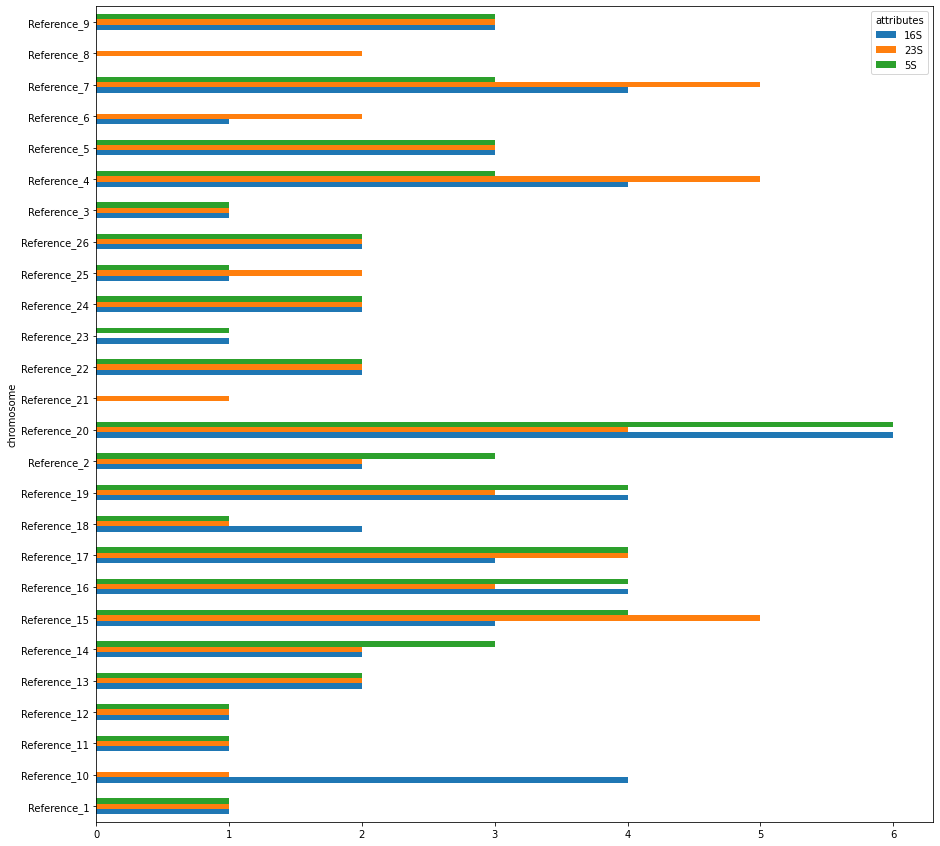

In [184]:
gff_df.groupby('attributes').chromosome.value_counts().unstack(0).plot.barh()